# Char RNN

In this notebook, we will go through basics of Char-RNN and use different datasets to create different RNNs.

Here we will use [fast.ai](https://docs.fast.ai  "Fastai Tutorial").


Everything is explained in-detail in [blog post](https://dudeperf3ct.github.io/rnn/2019/01/19/Force-of-Recurrent-Neural-Networks/). This is notebook which replicates the result of blog and runs in colab. Enjoy!


#### Run in Colab

You can run this notebook in google colab.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dudeperf3ct/DL_notebooks/blob/master/RNN/char_rnn_fastai.ipynb).



Here are some other very interesting results, [Cooking-Recipe](https://gist.github.com/nylki/1efbaa36635956d35bcc), [Obama-RNN](https://medium.com/@samim/obama-rnn-machine-generated-political-speeches-c8abd18a2ea0), [Bible-RNN](https://twitter.com/RNN_Bible), [Folk-music](https://soundcloud.com/seaandsailor/sets/char-rnn-composes-irish-folk-music), [Learning Holiness](https://cpury.github.io/learning-holiness/), [AI Weirdness](http://aiweirdness.com/), [Auto-Generating Clickbait](https://larseidnes.com/2015/10/13/auto-generating-clickbait-with-recurrent-neural-networks/).

## Download data

In [1]:
! wget "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt" -P {'data/'}
! wget "https://s3.amazonaws.com/text-datasets/nietzsche.txt" -P {'data/'}
! wget "http://www.gutenberg.org/files/31100/31100.txt" -P {'data/'}
! wget "http://www.gutenberg.org/cache/epub/29765/pg29765.txt" -P {'data/'}
! wget "https://raw.githubusercontent.com/ryanmcdermott/trump-speeches/master/speeches.txt" -P {'data/'}
! wget "https://raw.githubusercontent.com/mcleonard/pytorch-charRNN/master/data/anna.txt" -P {'data/'}
! wget "https://raw.githubusercontent.com/samim23/obama-rnn/master/input.txt" -P {'data/obama/'}

--2019-03-05 06:08:03--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘data/input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.06s   

2019-03-05 06:08:03 (17.5 MB/s) - ‘data/input.txt’ saved [1115394/1115394]

--2019-03-05 06:08:06--  https://s3.amazonaws.com/text-datasets/nietzsche.txt
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.9.85
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.9.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 600901 (587K) [text/plain]
Saving to: ‘data/nietzsche.txt’

nietzsche.txt       100%[===================>] 586.82K  --.-K

In [0]:
from fastai.text import *
from pathlib import Path

In [0]:
path = Path("data")

## Shakespeare RNN

In [0]:
#batch size
bs = 128

# datablock for language model
data_lm = TextLMDataBunch.from_folder(path, 'input.txt')

In [5]:
data_lm.show_batch()

idx,text
0,"caius xxmaj marcius is chief enemy to the people . \n \n xxmaj all : \n xxmaj we know't , we know't . \n \n xxmaj first xxmaj citizen : \n xxmaj let us kill him , and we 'll have corn at our own price . \n xxmaj is't a verdict ? \n \n xxmaj all : \n xxmaj no more talking"
1,"xxup valeria : \n xxmaj not out of doors ! \n \n xxup volumnia : \n xxmaj she shall , she shall . \n \n xxup virgilia : \n xxmaj indeed , no , by your patience ; i 'll not over the \n threshold till my lord return from the wars . \n \n xxup valeria : \n xxmaj fie ,"
2,"i may spur on my journey . \n \n xxmaj first xxmaj soldier : \n i shall , sir . \n \n xxup menenius : \n xxmaj the xxunk tells me we shall have news to - night . \n \n xxup brutus : \n xxmaj good or bad ? \n \n xxup menenius : \n xxmaj not according to the prayer"
3,"\n \n xxup menenius : \n xxmaj he 's right noble : \n xxmaj let him be call'd for . \n \n xxmaj first xxmaj senator : \n xxmaj call xxmaj coriolanus . \n \n xxmaj officer : \n xxmaj he doth appear . \n \n xxup menenius : \n xxmaj the senate , xxmaj coriolanus , are well pleased \n"
4,"xxmaj which we disdain should xxunk us , yet sought \n xxmaj the very way to catch them . \n \n xxup brutus : \n xxmaj you speak o ' the people , \n xxmaj as if you were a god to punish , not \n a man of their infirmity . \n \n xxup sicinius : \n ' xxmaj twere well \n"


In [0]:
# #Since above step can be a bit time-consuming, it's best to save the result.
# #This will create a 'tmp' directory where all the computed stuff will be stored
# data_lm.save('data_lm_export.pkl')

In [0]:
# # then reload those results using load_data
# data_lm = load_data(path, fname='data_lm_export.pkl')

We're not going to train a model that classifies the reviews from scratch. Like in computer vision, we'll use a model pretrained on a bigger dataset (a cleaned subset of wikipedia called [wikitext-103](https://einstein.ai/research/blog/the-wikitext-long-term-dependency-language-modeling-dataset)). That model has been trained to guess what the next word, its input being all the previous words. It has a recurrent structure and a hidden state that is updated each time it sees a new word. This hidden state thus contains information about the sentence up to that point.

We are going to use that 'knowledge' of the English language to build our classifier, but first, like for computer vision, we need to fine-tune the pretrained model to our particular dataset. Because the English of the reviews left by people on IMDB isn't the same as the English of wikipedia, we'll need to adjust the parameters of our model by a little bit. Plus there might be some words that would be extremely common in the reviews dataset but would be barely present in wikipedia, and therefore might not be part of the vocabulary the model was trained on.

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


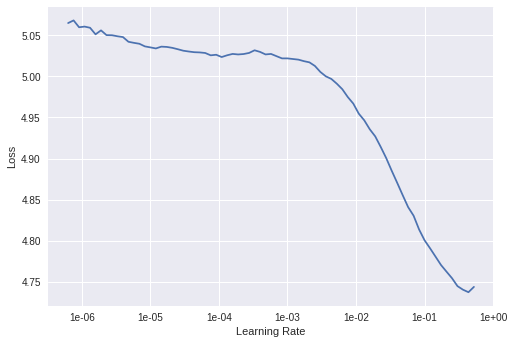

In [9]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [10]:
learn.fit_one_cycle(5, 5e-2, moms=(0.8,0.7))

In [0]:
#unfreeze the model and fine-tune it

learn.unfreeze()

In [12]:
learn.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

In [0]:
TEXT = "To be or not to"
N_WORDS = 500
N_SENTENCES = 2

In [14]:
print(learn.predict(TEXT, N_WORDS, temperature=0.75))

To be or not to be conclude . 
 
  First Citizen : 
  Proceed in justice and justice , and we will do 
  The proceed on the way . 
 
  Second Citizen : 
  Give me the rein . 
 
  First Citizen : 
  Against the all - seeing law , and Caius Marcius . 
 
  First Citizen : 
  We 'll tell you whether they may call us home ? 
 
  Second Citizen : 
  How curious ? what news will you ? 
 
  First Citizen : 
  What think you , sir ? 
 
  Second Citizen : 
  Ha ! why , wilt thou attend me ? 
 
  Third Citizen : 
  Ay , sir . 
 
  Second Citizen : 
  No , no ; for i tell you , the most noble fellow , 
  Against the needless fellow , and you 
  Against your good and true friends , 
  Against this fellow , you are all mad . 
 
  Third Citizen : 
  Sir , you must seem not to be so . 
 
  First Citizen : 
  How fares the patricians ? 
 
  Third Citizen : 
  Silence ! 
 
  Third Citizen : 
  Most fitly ! What is't o'clock ? 
 
  First Citizen : 
  Ay , but what you should say , to give you the greater

## NietzscheRNN

In [0]:
#batch size
bs = 128

# datablock for language model
data_lm = TextLMDataBunch.from_folder(path, 'nietzsche.txt')

In [16]:
data_lm.show_batch()

idx,text
0,"methods for \n xxunk a woman ? xxmaj certainly she has never allowed herself to be won ; and \n at present every kind of dogma stands with sad and xxunk xxunk -- xxup if , \n indeed , it stands at all ! xxmaj for there are xxunk who maintain that it \n has fallen , that all dogma lies on the ground -- nay"
1,"\n be necessary for the maintenance of beings such as ourselves . xxmaj supposing , \n in effect , that man is not just the "" measure of things . "" \n \n 4 . xxmaj the falseness of an opinion is not for us any objection to it : it is \n here , perhaps , that our new language sounds most strangely . xxmaj"
2,"really have happened that such a xxmaj will to xxmaj truth -- a certain \n extravagant and adventurous pluck , a xxunk 's ambition of the \n xxunk hope -- has participated therein : that which in the end always \n prefers a xxunk of "" certainty "" to a whole xxunk of beautiful \n possibilities ; there may even be puritanical fanatics of conscience ,"
3,"xxmaj in short , here , as everywhere else , \n let us beware of xxup superfluous xxunk xxunk of which \n is the instinct of self - preservation ( we owe it to xxmaj spinoza 's \n xxunk ) . xxmaj it is thus , in effect , that method xxunk , which must \n be essentially economy of principles . \n \n 14"
4,"attention , the straight look which fixes itself \n exclusively on one thing , the unconditional judgment that "" this and \n nothing else is necessary now , "" the inward certainty that obedience \n will be rendered -- and whatever else pertains to the position of the \n commander . a man who xxup wills commands something within himself which \n renders obedience ,"


In [0]:
# #Since above step can be a bit time-consuming, it's best to save the result.
# #This will create a 'tmp' directory where all the computed stuff will be stored
# data_lm.save('data_lm_export.pkl')

In [0]:
# # then reload those results using load_data
# data_lm = load_data(path, fname='data_lm_export.pkl')

We're not going to train a model that classifies the reviews from scratch. Like in computer vision, we'll use a model pretrained on a bigger dataset (a cleaned subset of wikipedia called [wikitext-103](https://einstein.ai/research/blog/the-wikitext-long-term-dependency-language-modeling-dataset)). That model has been trained to guess what the next word, its input being all the previous words. It has a recurrent structure and a hidden state that is updated each time it sees a new word. This hidden state thus contains information about the sentence up to that point.

We are going to use that 'knowledge' of the English language to build our classifier, but first, like for computer vision, we need to fine-tune the pretrained model to our particular dataset. Because the English of the reviews left by people on IMDB isn't the same as the English of wikipedia, we'll need to adjust the parameters of our model by a little bit. Plus there might be some words that would be extremely common in the reviews dataset but would be barely present in wikipedia, and therefore might not be part of the vocabulary the model was trained on.

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


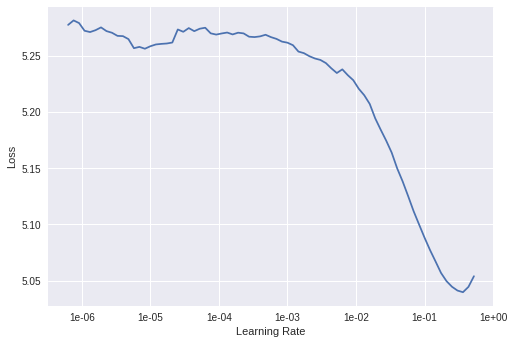

In [20]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [21]:
learn.fit_one_cycle(5, 5e-2, moms=(0.8,0.7))

In [0]:
#unfreeze the model and fine-tune it

learn.unfreeze()

In [23]:
learn.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

In [0]:
TEXT = "Every great philosophy"
N_WORDS = 500
N_SENTENCES = 2

In [25]:
print(learn.predict(TEXT, N_WORDS, temperature=0.75))

Every great philosophy in Germany has its own 
  philosophy : German philosophy , philosophy , philosophy , philosophy , philosophy , philosophy , philosophy , philosophy , philosophy , philosophy , philosophy , philosophy , philosophy , philosophy , philosophy , philosophy , art , art , and disguise appear 
  AS POSSIBLE . There is a noble 
  mode of life which is indispensable to the development of the civilization , which is 
  for instance the working out of the higher , more refined taste of the 
  soul , which is usually regarded as the 
  supreme disguise ; there is a sort of girl , or 
  girl , for whose taste it was tedious . The taste , which has its roots in 
  the slave - morality , is a kind of 
  everyday form of everything that lives and multiplies . It is 
  possible for a philosopher to determine what the 
  direction he may be taking in either a man or woman , as the " non - freedom of the will , " a former philosophy which has a 
  philosophy NOT as its true path . I

## ObamaRNN

In [0]:
#batch size
bs = 128

# datablock for language model
data_lm = TextLMDataBunch.from_folder(path/'obama/', 'input.txt')

In [66]:
data_lm.show_batch()

idx,text
0,"to the life and times of the man who xxunk our time . \n \n i did not know xxmaj mr. xxmaj cronkite personally . xxmaj and my regret is made more acute by the stories that have been shared here today . xxmaj nor , for that matter , did i know him any better than the tens of millions who turned to him each night in search"
1,"you can guess what xxmaj dr. xxmaj benjamin did . xxmaj with help from her community , she is rebuilding it again . xxmaj one disabled patient brought her an envelope with $ 20 inside . xxmaj another elderly man said simply , "" xxmaj maybe i can help . i got a hammer . "" \n \n xxmaj for nearly two decades , xxmaj dr. xxmaj regina xxmaj"
2,"\n \n xxmaj now , for those of you who took out your xxunk and paper -- altogether , these savings mean that we 've put about $ 950 billion on the table -- and that does n't count some of the long - term savings that we think will come about from reform -- from medical xxup it , for example , or increased investment in prevention ."
3,"are able to secure our networks as well as our prosperity . \n \n xxmaj our review was open and transparent . i want to acknowledge , xxmaj xxunk xxmaj xxunk -- who is here -- who is the xxmaj acting xxmaj senior xxmaj director for xxmaj cyberspace on our xxmaj national xxmaj security xxmaj council , who led the review team , as well as the xxmaj center"
4,"got to sort of -- i tear up a little bit when i think back to that day that i called xxmaj xxunk so many years ago and said , you and i can do wonderful things together . xxmaj and he said to me the same thing that partners all across xxmaj america are saying to one another right now : xxmaj let 's go to xxmaj iowa and"


In [0]:
# #Since above step can be a bit time-consuming, it's best to save the result.
# #This will create a 'tmp' directory where all the computed stuff will be stored
# data_lm.save('data_lm_export.pkl')

In [0]:
# # then reload those results using load_data
# data_lm = load_data(path, fname='data_lm_export.pkl')

We're not going to train a model that classifies the reviews from scratch. Like in computer vision, we'll use a model pretrained on a bigger dataset (a cleaned subset of wikipedia called [wikitext-103](https://einstein.ai/research/blog/the-wikitext-long-term-dependency-language-modeling-dataset)). That model has been trained to guess what the next word, its input being all the previous words. It has a recurrent structure and a hidden state that is updated each time it sees a new word. This hidden state thus contains information about the sentence up to that point.

We are going to use that 'knowledge' of the English language to build our classifier, but first, like for computer vision, we need to fine-tune the pretrained model to our particular dataset. Because the English of the reviews left by people on IMDB isn't the same as the English of wikipedia, we'll need to adjust the parameters of our model by a little bit. Plus there might be some words that would be extremely common in the reviews dataset but would be barely present in wikipedia, and therefore might not be part of the vocabulary the model was trained on.

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


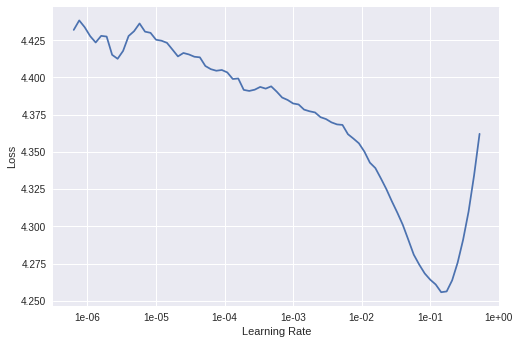

In [68]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [69]:
learn.fit_one_cycle(5, 5e-2, moms=(0.8,0.7))

In [0]:
#unfreeze the model and fine-tune it

learn.unfreeze()

In [71]:
learn.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

In [0]:
TEXT = "And the question I"
N_WORDS = 500
N_SENTENCES = 2

In [73]:
print(learn.predict(TEXT, N_WORDS, temperature=0.75))

And the question I ask you to decide is to give you hope . 
 
  Now , amid the work of the United States of America -- between the United States and Australia -- i will never hesitate to use force or use military force to prevent attacks in America . But i have to let that happen again . Our military personnel and our troops have stopped our mission and a legitimate President ’s focus is on our efforts to put our military together . 
 
  And that 's why we need to use a military force , which is why i am increasing our troop presence in Vietnam for the first time since the Vietnam War . In other words , the situation in Vietnam has been fluid . The United States and Israel have been stronger than ever as we have served America ’s long - term security . 
 
  The United States and the United States continue to support our military efforts against military and diplomatic efforts . In America , we ’re partnering with NATO allies to strengthen our diplomatic relations , and we 're partnerin

## TrumpRNN

In [0]:
#batch size
bs = 128

# datablock for language model
data_lm = TextLMDataBunch.from_folder(path, 'speeches.txt')

In [44]:
data_lm.show_batch()

idx,text
0,"xxmaj steve xxmaj king and have great respect likewise for xxmaj citizens xxmaj united , xxmaj david and everybody , and tremendous xxunk for the xxmaj tea xxmaj party . xxmaj also , also the people of xxmaj iowa . xxmaj they have something in common . xxmaj hard - working people . xxmaj they want to work , they want to make the country great . i love the"
1,"these are minor details . xxmaj we have some good people . \n xxmaj it ' ca n't be xxmaj mitt because xxmaj mitt ran and failed . xxmaj he failed . i mean i liked him . xxmaj look -- like him , dislike him -- the xxunk % statement that he made , that 's not going away . xxmaj the xxmaj xxunk from xxmaj massachusetts ,"
2,"after xxmaj secretary xxmaj clinton ’s failed xxunk in xxmaj libya , xxmaj islamic terrorists in xxmaj benghazi took down our xxunk and killed our ambassador and three brave xxmaj americans . xxmaj then , instead of taking charge that night , xxmaj hillary xxmaj clinton decided to go home and sleep . xxmaj incredible . \n \n \n xxmaj clinton xxunk it all on a xxunk , an"
3,"if we do that — and if we do that , perhaps this xxunk can be the most peaceful and prosperous the world has ever , ever known . xxmaj thank you very much , everybody . i appreciate it . xxmaj thank you . \n \n \n xxup speech 3 \n \n \n a hand with little xxunk coming out of a xxunk . xxmaj like ,"
4,"lie : xxmaj obamacare . xxmaj obamacare . \n \n \n xxmaj yesterday , it came out that costs are going for people up 29 , 39 , 49 , and even 55 percent , and deductibles are through the roof . xxmaj you have to be hit by a tractor , literally , a tractor , to use it , because the deductibles are so high , it"


In [0]:
# #Since above step can be a bit time-consuming, it's best to save the result.
# #This will create a 'tmp' directory where all the computed stuff will be stored
# data_lm.save('data_lm_export.pkl')

In [0]:
# # then reload those results using load_data
# data_lm = load_data(path, fname='data_lm_export.pkl')

We're not going to train a model that classifies the reviews from scratch. Like in computer vision, we'll use a model pretrained on a bigger dataset (a cleaned subset of wikipedia called [wikitext-103](https://einstein.ai/research/blog/the-wikitext-long-term-dependency-language-modeling-dataset)). That model has been trained to guess what the next word, its input being all the previous words. It has a recurrent structure and a hidden state that is updated each time it sees a new word. This hidden state thus contains information about the sentence up to that point.

We are going to use that 'knowledge' of the English language to build our classifier, but first, like for computer vision, we need to fine-tune the pretrained model to our particular dataset. Because the English of the reviews left by people on IMDB isn't the same as the English of wikipedia, we'll need to adjust the parameters of our model by a little bit. Plus there might be some words that would be extremely common in the reviews dataset but would be barely present in wikipedia, and therefore might not be part of the vocabulary the model was trained on.

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


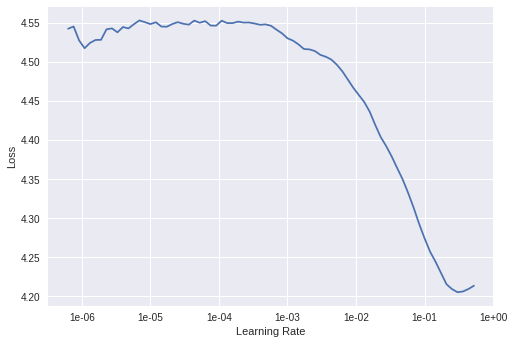

In [48]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [49]:
learn.fit_one_cycle(5, 5e-2, moms=(0.8,0.7))

In [0]:
#unfreeze the model and fine-tune it

learn.unfreeze()

In [51]:
learn.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

In [0]:
TEXT = "Fake news"
N_WORDS = 500
N_SENTENCES = 2

In [53]:
print(learn.predict(TEXT, N_WORDS, temperature=0.75))

Fake news conference ( WE ARE a FREE TRADE DEAL that WE LOVE IT , AND WE DON'T WIN . WE HAVE a VERY SMART MAN FOR THE COUNTRY THAT WE NEED AND WE NEED TO MAKE AMERICA SO GREAT AGAIN . HE WAS GOING TO BE a FREE AND OPEN TRADE DEALS . WE HAVE a CANDIDATE THAT WE HAVE TO BE STRONG TO MY FAMILY AND HERE IS HOW PUT IT TO US , GOING TO TAKE CARE OF THE PEOPLE , WE HAVE TO LOOK AT CHINA . WE HAVE A LONG WAY TO DO IT . AND i HAVE TO BE THE PIGGY BANK THAT 'S ABOUT TRADE , YOU NEED THEM THAT i HAVE . THAT HAS BEEN AND NOW WE HAVE THE GREATEST BUSINESSMEN IN THE WORLD AND THEY HAVE TO GO BACK AND TAKE OUR JOBS BACK , WE HAVE PROBLEMS WITH OUR PEOPLE THAT TAKE OUR JOBS . WE HAVE a TINY FRACTION OF WHAT WE 'RE ABOUT AND i WAS IN . AND WE HAVE TO TAKE a LOOK AT WHAT WE WANT TO DO WITH OUR BUSINESS , WITH OUR COUNTRY . WE HAVE TO GET IT BACK BEFORE , WE DON'T WANT THAT . WE HAVE a REAL THING ABOUT IT . WE'RE GOING TO MAKE GREAT DEALS AND NEGOTIATORS . WE HAVE TO GET PARTS OF THESE COUNTRIES . WE HAV

## AnnaRNN

In [0]:
#batch size
bs = 128

# datablock for language model
data_lm = TextLMDataBunch.from_folder(path, 'anna.txt')

In [55]:
data_lm.show_batch()

idx,text
0,"to \n her husband that she could not go on living in the same house with him . \n xxmaj this position of affairs had now lasted three days , and not only the \n husband and wife themselves , but all the members of their family and \n household , were painfully conscious of it . xxmaj every person in the house \n felt"
1,"rings that slipped \n down on her bony fingers , and fell to going over in her memory all the \n conversation . "" xxmaj he has gone ! xxmaj but has he broken it off with her ? "" she \n thought . "" xxmaj can it be he sees her ? xxmaj why did n't i ask him ! xxmaj no , no , \n"
2,"was my last \n effort . xxmaj and i did try with all my soul . i ca n't . i 'm no good at it . "" \n \n "" xxmaj it 's not that you 're no good at it , "" said xxmaj sergey xxmaj ivanovitch ; "" it is \n that you do n't look at it as you should . "" \n"
3,"it must be settled . "" \n \n "" xxmaj what did you go away for ? "" \n \n "" xxmaj ah , stop a minute ! xxmaj ah , the thoughts that come crowding on one ! xxmaj the \n questions one must ask oneself ! xxmaj listen . xxmaj you ca n't imagine what you 've \n done for me by what you"
4,"i am fond of the country , "" said xxmaj vronsky , noticing , and affecting not to \n notice , xxmaj levin 's tone . \n \n "" xxmaj but i hope , count , you would not consent to live in the country \n always , "" said xxmaj countess xxmaj nordston . \n \n "" i do n't know ; i have never"


In [0]:
# #Since above step can be a bit time-consuming, it's best to save the result.
# #This will create a 'tmp' directory where all the computed stuff will be stored
# data_lm.save('data_lm_export.pkl')

In [0]:
# # then reload those results using load_data
# data_lm = load_data(path, fname='data_lm_export.pkl')

We're not going to train a model that classifies the reviews from scratch. Like in computer vision, we'll use a model pretrained on a bigger dataset (a cleaned subset of wikipedia called [wikitext-103](https://einstein.ai/research/blog/the-wikitext-long-term-dependency-language-modeling-dataset)). That model has been trained to guess what the next word, its input being all the previous words. It has a recurrent structure and a hidden state that is updated each time it sees a new word. This hidden state thus contains information about the sentence up to that point.

We are going to use that 'knowledge' of the English language to build our classifier, but first, like for computer vision, we need to fine-tune the pretrained model to our particular dataset. Because the English of the reviews left by people on IMDB isn't the same as the English of wikipedia, we'll need to adjust the parameters of our model by a little bit. Plus there might be some words that would be extremely common in the reviews dataset but would be barely present in wikipedia, and therefore might not be part of the vocabulary the model was trained on.

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


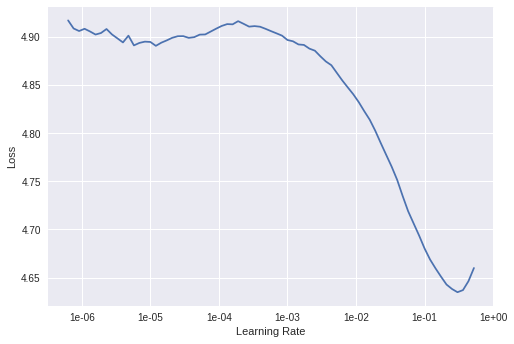

In [59]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [60]:
learn.fit_one_cycle(5, 5e-2, moms=(0.8,0.7))

In [0]:
#unfreeze the model and fine-tune it

learn.unfreeze()

In [62]:
learn.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

In [0]:
TEXT = "Anna"
N_WORDS = 500
N_SENTENCES = 2

In [64]:
print(learn.predict(TEXT, N_WORDS, temperature=0.75))

Anna Arkadyevna Karenina _ 
  Linking together a new trait in her master and her new nurse , Alexey 
  Alexandrovitch had been a French marquise , and had given food to her , and seemed to her a 
  propos de la femme la angel in the dim daylight of the theater . 
 
  She looked at him with a timid and guilty air , but at the same time she 
  was appalled at the fact that she was a distant part of his 
  regiment . He was more active in wrangling with him than anyone in the world ; 
  he saw that he never saw in his soul what he had been 
  thinking about . He felt that this was what he was thinking of himself . He must 
  find he responsible for everything , and had no special charm in him . But he had a feeling of love in 
  her soul , which had always hitherto been unbearable to her , and he felt that it was impossible to 
  take her in love . He felt that he was himself aware of the 
  force that filled her soul , and what he was doing , and she knew that in this matter she ought no